 # Homework 5
 ## by Franklin marsh
 ### Math0154 Computational Statistics 
 #### with Prof. Gabe Chandler

Read http://www.mit.edu/~ilkery/papers/GibbsSampling.pdf

Write code to both generate from the process described.  

Then perform a Gibbs sampler routine to perform Bayesian inference with your data.  (Note that a discrete uniform routine needs to be used for the posterior conditional for n).  All the details are given in the paper.  
Write a half page to a page (not including graphics) to talk about how this works. 

The posterior distribution that we are trying to infer is 

$$p(\lambda_{1},\lambda_{2}, n|x_{1:N}) \propto p(x_{1:n}|\lambda_{1})p(x_{n+1:N}|\lambda_{2})p(\lambda_{1})p(\lambda_{2})p(n) $$ 

In [3]:
#set the randon seed
set.seed(12345)

The parameter that we are trying to infer is the change-point of a function that draws observations from two distributions.

This function will draw $N$ observations from two distributions - one with scale $a$, and one with scale $b$. The function will switch distributions at some point $n < N$, which will be randomly selected.

In [143]:
#define generating function parameters
N <- 100
a <- 2
b <- 1

#select n
#n <- sample((1:N),1)
n <- 80

We will now generate the array of lambda values, which has length $N$

In [144]:
lambda1 <- rgamma(1, scale = 1, shape = 1.0/b) #the lambdas up until the changepoint
lambda2 <- rgamma(1, scale = 1, shape = 1.0/b) #the lambdas after the changepoint

In [145]:
print(lambda1)
print(lambda2)

[1] 2.335998
[1] 0.7088361


In [146]:
x_a <- rpois(n, lambda = lambda1) #this generates the observations up to the turning point
x_b <- rpois(N-n, lambda = lambda2) #
x <- c(x_a, x_b) #concatenate the two vectors into a continuous sequence

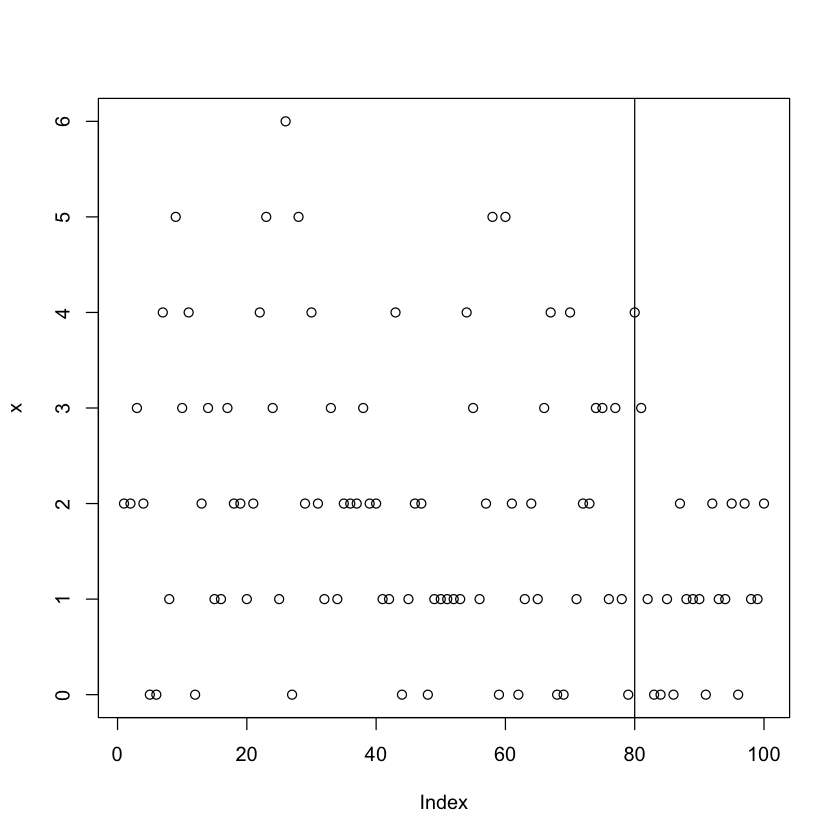

In [148]:
plot(x)
abline(v = n)

We will need three empty lists to store the chain estimates of the three parameters: ($n, \lambda_{1}, \lambda_{2}$). This will have as many instances as the number of iterations that we choose to run.

In [149]:
# Gibbs sampler
E <- 110 #the number of iterations that the Gibbs sampler will perform
burn_in <- 10 #the number of iterations to throw away at the start of the sampling routine

#initialize vectors for storing the samples
path_n <- rep(0, E)
path_lambda1 <- rep(0, E)
path_lambda2 <- rep(0, E)

Now, we will start to construct the Gibbs sampler. We want the Gibbs sampler to estimate $n$ (the location of the changepoint), the pre-changepoint lambda value ($\lambda_{1}$), and the post changepoint lambda value ($\lambda_{2}$). We must give the change starting values for each of the three parameters that it is trying to estimate.

In [150]:
n <- sample((1:N),1) #initial n value
lambda1 <- rgamma(1, scale = 1, shape = 1.0/b) #initial lambda1 value
lambda2 <- rgamma(1, scale = 1, shape = 1.0/b) #initial lambda2 value

In [151]:
for (i in (1:E)) { #for each planned iteration
    
    lambda1 <- rgamma(a + sum(x[1:n]), scale = 1, shape = 1.0/(n + b))[1]
    lambda2 <- rgamma(a + sum(x[n:N]), scale = 1, shape = 1.0/((N-n) + b))[1]
    
    mult_n <- rep(0, N) #create empty mult_n vector
    
    for (j in (1:N)) {
        mult_n[j] <- sum(x[0:j])*log(lambda1) - j*lambda1 + sum(x[j:N])*log(lambda2) - (N-j)*lambda2
    }
    
    mult_n <- exp(mult_n - max(mult_n))
    n <- which.max(rmultinom(1, size = 1, prob = (mult_n/sum(mult_n))))
    
    path_n[i] <- n #update the path 
    path_lambda1[i] <- lambda1
    path_lambda2[i] <- lambda2
    
}

walk <- data.frame(path_n, path_lambda1, path_lambda2)
walk <- walk[-c(1:burn_in),]

Swap shape and scale parameters for rgamma

In [157]:
for (i in (1:E)) { #for each planned iteration
    
    lambda1 <- rgamma(a + sum(x[1:n]), shape = 1, scale = 1.0/(n + b))[1]
    lambda2 <- rgamma(a + sum(x[n:N]), shape = 1, scale = 1.0/((N-n) + b))[1]
    
    mult_n <- rep(0, N) #create empty mult_n vector
    
    for (j in (1:N)) {
        mult_n[j] <- sum(x[0:j])*log(lambda1) - j*lambda1 + sum(x[j:N])*log(lambda2) - (N-j)*lambda2
    }
    
    mult_n <- exp(mult_n - max(mult_n))
    n <- which.max(rmultinom(1, size = 1, prob = (mult_n/sum(mult_n))))
    
    path_n[i] <- n #update the path 
    path_lambda1[i] <- lambda1
    path_lambda2[i] <- lambda2
    
}

walk <- data.frame(path_n, path_lambda1, path_lambda2)
walk <- walk[-c(1:burn_in),]

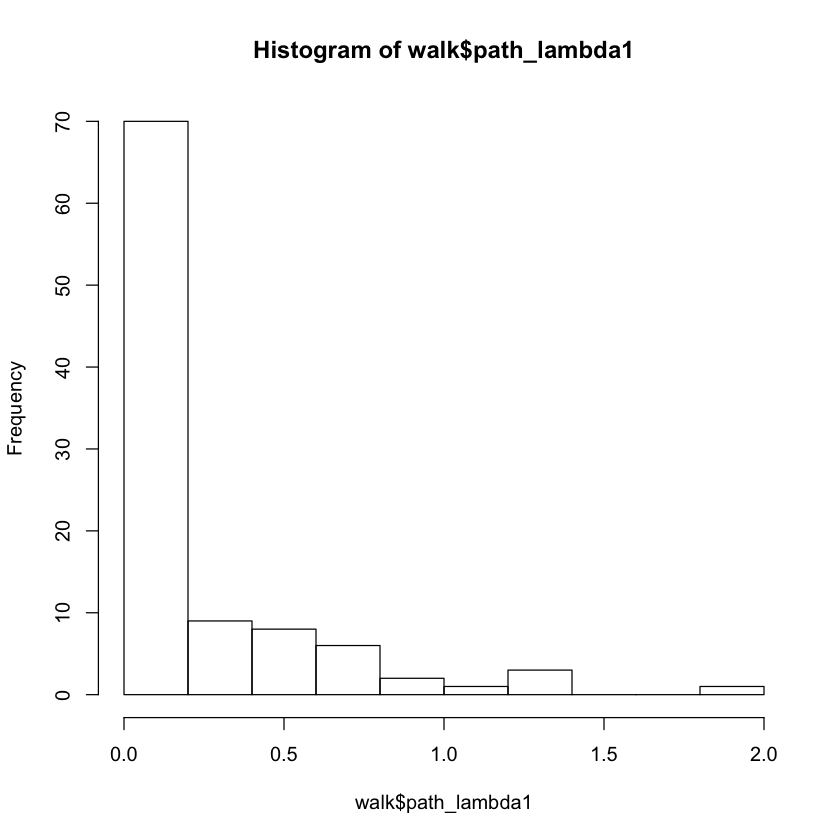

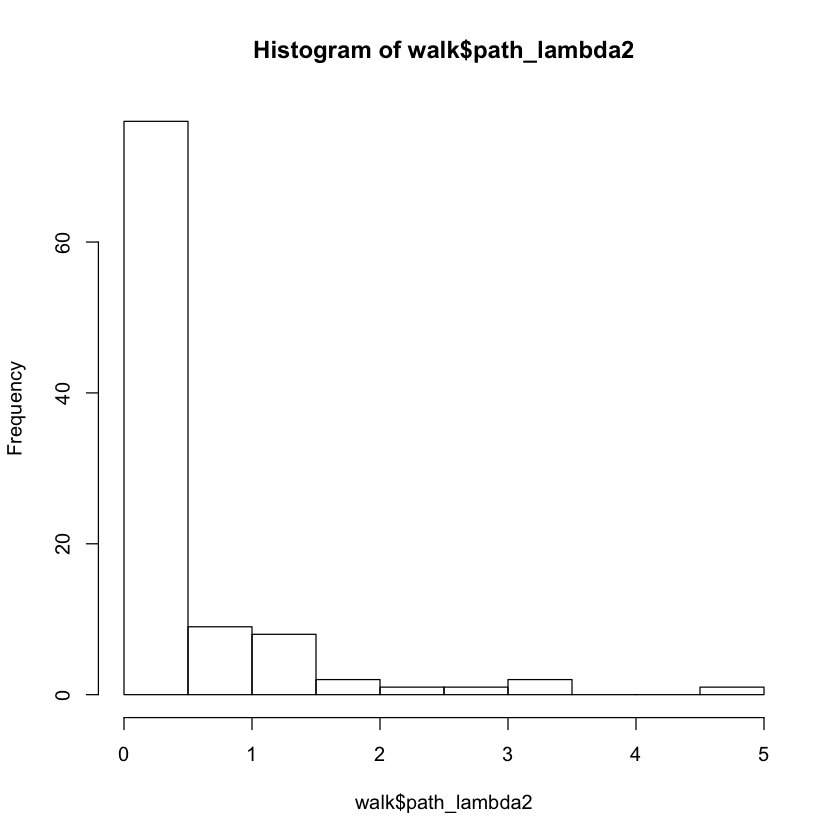

In [158]:
hist(walk$path_lambda1)
hist(walk$path_lambda2)

In this case, the Gibbs Sampler is used to estimate three independent parameters of the generating distribution.

In [85]:
?rgamma

GammaDist {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
rate,an alternative way to specify the scale.
"shape, scale","shape and scale parameters. Must be positive, scale strictly."
"log, log.p","logical; if TRUE, probabilities/densities p are returned as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."
